In [1]:
import control as ct
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# 1. Introduction

In this part of the course, we represent system models utilizing a set of ordinary differential
equations in a convenient matrix-vector form. The time domain is the mathematical domain that incorporates the description of the system, including the inputs, outputs, and response, in terms of time, $t$.

Linear time-invariant single-input, single-output (SISO) models, can be represented via state variable models. Powerful mathematical concepts from linear algebra and matrix-vector analysis, as well as effective computational tools, can be utilized in the design and analysis of control systems in the time domain. Also, these time domain design and analysis methods are readily extended to nonlinear, time-varying, and multiple input–­output systems. As we shall see, mathematical models of linear time-invariant physical ­systems can be represented in either the frequency domain or the time domain. The time domain design techniques are another tool in the designer’s toolbox.

The time-domain representation of control systems is an essential basis for modern control theory and system optimization. In later parts, we will have an opportunity to design optimum control systems by utilizing time-domain methods.

In this part, we develop the time-domain representation of control systems and illustrate several methods for the solution of the system time response.

# 2.The state variables and state equations 
The time-domain analysis and design of control systems uses the concept of the state of a system:

## 2.1 System state

> The state of a system is a set of variables whose values, together with the input signals and the equations describing the dynamics, will provide the future state and output of the system.

![](pics/diag19.svg)

For a dynamic system, the state system is described in terms of a set of state variables:
$$
\mathbf{q}(t) =\begin{bmatrix}q_{1}(t)\\q_{2}(t)\\\vdots\\ q_{n}(t)\end{bmatrix}
$$
The state variables $q_{i}(t)\vert_{i=1\dots n}$ are those variables that determine the future behavior of a system when the actual state and input of the system are known. 

***Example 01***
The concept of a set of state variables that represent a dynamic system can be illustrated in terms of the spring-mass-damper system shown in the following figure:

![](pics/diag20.svg)
We had already established the EDO for this system as follow:
$$
M\ddot{y}+b\dot{y}+ky=x(t)
$$
To derive the state space representation from these ODE we can proceed as follow:
$$
\mathbf{q}(t)=\left\{\begin{aligned}
q_{1}(t)&= y(t)\\
q_{2}(t) &= \dot{y}(t)\\
\end{aligned}\right.
$$

## 2.2 State equation
The differential state equation of the system becomes:
$$
\dot{\mathbf{q}}(t) = \underbrace{\begin{bmatrix}0&1\\-{k\over M}&-{b\over M}\end{bmatrix}}_{\mathrm{A}}\mathbf{q}(t)+\underbrace{\begin{bmatrix}0\\{1\over M}\end{bmatrix}}_{\mathrm{B}}x(t)
$$
The output of the system is given by:
$$
y(t) = \underbrace{\begin{bmatrix}1&0\end{bmatrix}}_{\mathrm{C}}\mathbf{q}(t) + \underbrace{0}_{\mathrm{D}}x(t)
$$
We can now conclude that the state space representation for a spring-mass-damper system is fully known if the following parameters are well defined:
$$
\left\{\mathrm{A,B,C,D}\right\}
$$

| State-Space parameter | Explanation                                                                                       |
| :-------------------- | ------------------------------------------------------------------------------------------------- |
| $\mathrm{A}$          | is a $n\times n$ matrix that represent the transition matrix of the system and encode its dynamic |
| $\mathrm{B}$          | is a matrix that represents how the input acts on the system and changes its behavior.            |
| $\mathrm{C}$          | is a matrix that specify how space variable can we observe in the output.                         |
| $D$                   | is a matrix that represent the effect of the input directly on the output.                        |

`NB: In the state space representation the state equation is always a first-order differential equation`

***Example 02***
As another example of the state variable characterization of a system, consider
the RLC circuit shown in the following figure:
![](pics/cap30.png)
For this example we chose as state variables:
$$
\mathbf{q}(t)=\begin{cases}q_{1}(t)=v_{c}(t)\\q_{2}(t)=i_{L}(t)\end{cases}
$$
The input of the system is the current $u(t)$ and the output is the resistance voltage $v_{0}(t)$. Now we can easily derive the state equation for this electrical system:
$$
\dot{\mathbf{q}}(t) = \underbrace{\begin{bmatrix}0&-{1\over c}\\{1\over L}&-{R\over L}\end{bmatrix}}_{\mathrm{A}}\mathbf{q}(t)+\underbrace{\begin{bmatrix}{1\over c}\\0\end{bmatrix}}_{\mathrm{B}}x(t)
$$
The output of this system is given by
$$
y(t) = \underbrace{\begin{bmatrix}0&R\end{bmatrix}}_{\mathrm{C}}\mathbf{q}(t) + \underbrace{0}_{\mathrm{D}}x(t)
$$

# 3. The state differential equation
The response of a system is described by the set of first-order differential equations written in terms of the state variables $q_1(t), q_{2}(t),\dots , q_{n}(t)$ and the inputs $x_1(t), x_2(t), \dots , x_m(t )$. A set of linear first-order differential equations can be written in general form as:
$$
\underbrace{\begin{bmatrix}\dot{q}_{1}(t)\\\dot{q}_{2}(t)\\\vdots\\\dot{q}_{n}(t)\end{bmatrix}}_{\dot{\mathbf{q}}(t)}=\underbrace{\begin{bmatrix}a_{11}&a_{12}&\dots&a_{1n}\\
a_{21}&a_{22}&\dots&a_{2n}\\ 
\vdots & \vdots &\ddots &\vdots\\
a_{n1}&a_{n2}&\dots & a_{nn}
\end{bmatrix}}_{\mathrm{A}}\underbrace{\begin{bmatrix}q_{1}(t)\\q_{2}(t)\\\vdots\\q_{n}(t)\end{bmatrix}}_{\mathbf{q}\text{: State vector}}+\underbrace{\begin{bmatrix}
b_{11}& b_{12}&\dots & b_{1m}\\
b_{21}& b_{22}&\dots & b_{2m}\\
\vdots & \vdots &\ddots & \vdots\\
b_{n1}& b_{n2}&\dots & b_{nm}\\
\end{bmatrix}}_{\mathrm{B}}\underbrace{\begin{bmatrix}x_{1}(t)\\x_{2}(t)\\\vdots\\x_{m}(t)\end{bmatrix}}_{\mathbf{x}(t)\text{: System input}}
$$
Then the system can be represented by the compact notation of the **state differential equation** as:
$$
\dot{\mathbf{q}}(t) = \mathrm{A}\mathbf{q}(t)+\mathrm{B}\mathbf{x}(t)
$$
The **output equation** of the system is given by:
$$
\mathbf{y}(t) = \mathrm{C}\mathbf{q}(t)+\mathrm{D}\mathbf{x}(t)
$$


## 3.1 Solution of state equation
To solve the state equation established before we were use the Laplace transform as follow:
$$\begin{aligned}
\mathcal{L}\left\{\dot{\mathbf{q}}(t)\right \}&=s\mathbf{Q}(s)-\mathbf{q}_{0}\\
s\mathbf{Q}(s)-\mathbf{q}_{0} &= \mathrm{A}\mathbf{Q}(s) - B \mathbf{X}(s)\\[0.25cm]
\mathbf{Q}(s) &= (s\mathrm{I}-\mathrm{A})^{-1}\mathbf{q}_{0} + (s\mathrm{I}-\mathrm{A})^{-1}\mathrm{B}\mathbf{X}(s)\\[0.25cm]
\mathbf{q}(t) &= \mathcal{L}^{-1}\left\{(s\mathrm{I}-\mathrm{A})^{-1}\mathbf{q}_{0} + (s\mathrm{I}-\mathrm{A})^{-1}\mathrm{B}\mathbf{X}(s)\right\}
\end{aligned}
$$

We can easily show that:
$$
(s\mathrm{I}-\mathrm{A})^{-1}\overset{\mathcal{L}^{-1}}{\Rightarrow}\Phi(t)
$$With $\Phi(t)$ is the state transition matrix. Then the solution of the state equation is given by:
$$
\mathbf{q}(t) = \Phi(t)\mathbf{q}_{0}+\int_{0}^{t}\Phi(t-\lambda)\mathrm{B}\mathbf{x}(\lambda)d\lambda
$$

### 3.1.2 Unforced solution
The unforced solution of the state equation is obtained for $\mathbf{x}(t) = \mathbf{0}$:
$$
\mathbf{q}(t) = \Phi(t) \mathbf{q}_{0}
$$
To determine the state transition matrix, we set all initial conditions to zero except for one state variable, allowing us to evaluate the output of each state variable. The term $\Phi_{ij}(t)$ indicates the response of the $i^\text{th}$ state variable due to an initial condition on the $j^\text{th}$ state variable, with all other variables at zero. 

***Example: Two rolling cars***

![](pics/diag21.svg)

We have $M_{1}=M_{2}$ the mass of the two carts and $x_{1}(t), x_{2}(t)$ are the positions of carts. $k_{1}\text{ and } k_{2}$ are the spring constants. $b_{1}\text{ and }b_{2}$ the damping coefficients. 
For mass $M_{1}$ we have:
$$
M_{1}\ddot{x}_{1}(t) + b_{1}\dot{x}_{1}(t) + k_{1}x_{1}(t) = x(t) + b_{1}\dot{x}_{2}(t) + k_{1}x_{2}(t) 
$$
For mass $M_{2}$ we have:
$$
M_{2}\ddot{x}_{2}(t) + (b_{1}+b_{2})\dot{x}_{2}(t) + (k_{1}+k_{2})x_{2}(t) = b_{1}\dot{x}_{1}(t) + k_{1}x_{1}(t) 
$$
We chose the state vector as below:
$$
\mathbf{q} = \begin{bmatrix}x_1(t)\\x_2(t)\\\dot{x}_1(t)\\\dot{x}_{2}(t)\end{bmatrix}
$$
The state equation becomes:
$$
\dfrac{d}{dt}\begin{bmatrix}q_{1}\\q_{2}\\q_{3}\\q_{4}\end{bmatrix}=
\underbrace{\begin{bmatrix} 
0&0&1&0\\
0&0&0&1 \\ 
-{k_{1}\over M_{1}}&{k_{1}\over M_{1}}&-{b_{1}\over M_{1}}&{b_{1}\over M_{1}} \\ 
{k_{1}\over M_{2}}&-{k_{1}+k_{2}\over M_{2}}&{b_{1}\over M_{2}}&-{b_{1}+b_{2}\over M_{2}}
\end{bmatrix}}_{\mathrm{A}}\mathbf{q} + \underbrace{\begin{bmatrix}0\\0\\{1\over M_{1}}\\0\end{bmatrix}}_{\mathrm{B}}x
$$
The output of this system is given by the position of the cart 1:
$$
y(t) = \underbrace{\begin{bmatrix}1 & 0 & 0 & 0\end{bmatrix}}_{\mathrm{C}}\mathbf{q}
$$
The unforced solution is given by:
$$
	\mathbf{q}(t) = \Phi(t)\mathbf{q}_{0}= e^{\mathrm{A}t}\mathbf{q}_{0}=\mathrm{V}e^{\Lambda t}\mathrm{V}^{-1}\mathbf{q}_{0} 
$$With $\Lambda$ the eigenvalues $\mathrm{A}\text{-matrix}$ and $\mathrm{V}$ the eigenvectors of the $\mathrm{A}\text{-matrix}$.

+ **Simulation:**

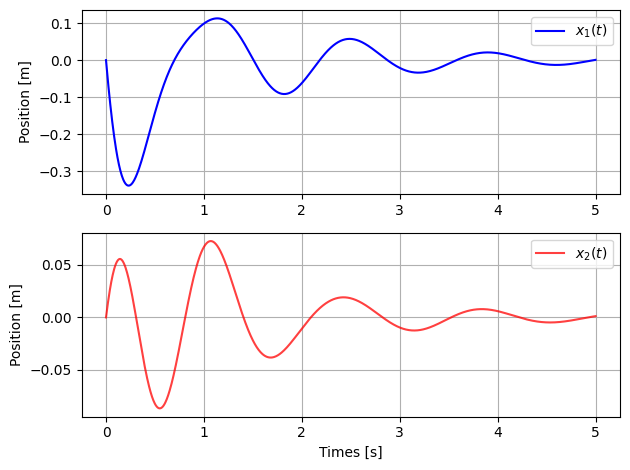

In [8]:
from numpy.linalg import inv, eig

k1,k2,b1,b2,M1,M2 = [150, 700, 15, 30, 5, 20]
A = np.array([[0,0,1,0],[0,0,0,1],[-k1/M1,k1/M1,-b1/M1,b1/M1],[k1/M2,-(k1+k2)/M2,b1/M2,-(b1+b2)/M2]])
B = np.array([0,0,1/M1,0])
C = np.array([[1,0,0,0]])
Lamb,V = eig(A) 
q0 = [0.1,0,0,0]
tt = np.linspace(0.0,5.0,1024)
Phi = [V@np.diag(np.exp(Lamb*t))@inv(V) for t in tt]
q = np.array([phi@q0 for phi in Phi])
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(tt,q[:,0].real,label=r"$x_{1}(t)$", color='blue')
ax2.plot(tt,q[:,1].real,label=r"$x_2(t)$",color='red', alpha=0.75)
ax2.set_xlabel("Times [s]")
ax1.set_ylabel("Position [m]")
ax2.set_ylabel("Position [m]")
ax1.grid(True)
ax2.grid(True)
ax1.legend()
ax2.legend()
fig.tight_layout()
plt.show()  

## 3.1.3 Step response
This time we will take $x(t)=u(t)$ and see how the state vector of our system will evolve
$$
q(t) = \Phi(t)\mathbf{q}(0) + \int_{0}^{t}\Phi(t-\lambda)Bu(\lambda)d\lambda
$$
where $\Phi(t) = \mathcal{L}^{-1}\left\{(s\mathrm{I}-\mathrm{A})^{-1}\right\}=\exp(\mathrm{A}t)$

In [17]:
k1,k2,b1,b2,M1,M2 = [150, 700, 15, 30, 5, 20]
A = np.array([[0,0,1,0],[0,0,0,1],[-k1/M1,k1/M1,-b1/M1,b1/M1],[k1/M2,-(k1+k2)/M2,b1/M2,-(b1+b2)/M2]])
B = np.array([0,0,1/M1,0])
C = np.array([[1,0,0,0]])
q0 = [0.1,0,0,0]
tt = np.linspace(0.0,15.0,1024)
sys = ct.ss(A,B,C,0)
sys

StateSpace(
array([[  0.  ,   0.  ,   1.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   1.  ],
       [-30.  ,  30.  ,  -3.  ,   3.  ],
       [  7.5 , -42.5 ,   0.75,  -2.25]]),
array([[0. ],
       [0. ],
       [0.2],
       [0. ]]),
array([[1., 0., 0., 0.]]),
array([[0.]]),
states=4, outputs=1, inputs=1)

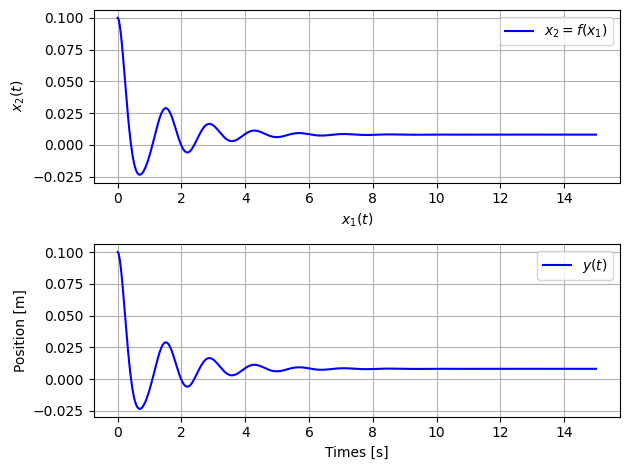

In [19]:
out = sys.step_response(timepts=tt,initial_state=q0,return_states=True)
qt = out.x.squeeze().T
yt = out.y.squeeze().T
ut = out.u.squeeze().T
tt = out.t 
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(tt,qt[:,0],label=r"$x_{2}=f(x_{1})$", color='blue')
ax2.plot(tt,yt,label=r"$y(t)$",color='blue')
ax1.set_xlabel(r"$x_{1}(t)$")
ax1.set_ylabel(r"$x_{2}(t)$")
ax2.set_xlabel("Times [s]")
ax2.set_ylabel("Position [m]")
ax1.grid(True)
ax2.grid(True)
ax1.legend()
ax2.legend()
fig.tight_layout()
plt.show()  

# 4. Signal flow graph and block diagram  models
It's useful to develop a graphical model of the system and use this model to relate the state variable concept to the familiar transfer function representation. The graphical model can be represented via signal-flow graphs or block diagrams.

As we have learned in previous sections, a system can be meaningfully described by an input–output relationship, the transfer function $H(s)$. For example, if we are interested in the relation between the output voltage $v_{0}(t)$ and the input current $u(t)$ of the network of the following figure: 

![](pics/cap30.png)

we can obtain the transfer function:
$$
H(s)=\frac{V_{0}(s)}{U(s)}=\frac{\frac{R}{LC}}{s² + \frac{R}{L}s + \frac{1}{LC}}
$$

The signal-flow graph state model and the block diagram model can be readily
derived from the transfer function of a system:

![](pics/diag22.svg)

The block diagram can be deduced directly from the signal flow graph:

![](pics/diag23.svg)

However, there is more than one alternative set of state variables and therefore there is
more than one possible form for the signal-flow graph and block diagram models. There are several key canonical forms of the state-variable representation, such
as the phase variable canonical form, that we will investigate here. 

Let consider the following example
$$
\begin{aligned}
H(s) &= \frac{b_{0}}{s^{4}+a_{3}s^{3}+a_{2}s²+a_{1}s+a_0}\\
&=\frac{b_{0}s^{-n}}{1+a_{3}s^{-1}+a_{2}s_{-2} +a_{1}s^{-3}+a_{0}s^{-4}}\\ 
\end{aligned}
$$ 

## 4.1 Mason's gain formula
Mason's formula or rule is a systematic way to compute the overall transfer function of a system represented by a signal flow graph (SFG). It gives the ratio between the output and the input of the system:

$$
H(s) = \frac{Y(s)}{T(s)} = \frac{\sum\limits_{k=1}^{N}P_{k}\Delta_{k}}{\Delta}
$$
with:

| Terms      | Explanation                                                                            |
| :--------- | -------------------------------------------------------------------------------------- |
| $P_{k}$    | The gain of the k-th forward path (from input to output)                               |
| $N$        | number of forward path                                                                 |
| $\Delta$   | The determinent of the graph defined as:                                               |
|            | $\Delta = 1 - \sum L_{i} + \sum L_{i}L{j}-\sum L_{i}L_{j}L_{k}+\dots$                  |
|            | where:                                                                                 |
|            | $L_i$ gain of a feedback path (loop)                                                   |
|            | The signs alternate                                                                    |
|            | Products are only taken along non-touching loops (loops that not share any node)       |
| $\Delta_k$ | The same as $\Delta$ but calculated with all loop touching forward path $P_k$ removed. |
If we consider the Mason's gain formula we can convert our transfer function into a signal flow graph. Given the structure of the transfer function we can conclude that we have a single direct path from the input to the output with a gain equal to $b_0$ and four loops which do not share any nodes.

![](pics/diag24.svg)

Let's now take a transfer function with a polynomial numerator of order 3:
$$
H(s) = \frac{b_{3}s^{-1}+b_{2}s^{-2}+b_{1}s^{-3}+b_{0}s^{-4}}{1 + a_{3}s^{-1}+a_{2}s^{-2}+a_{1}s^{-3}+a_{0}s^{-4}}
$$
If we apply the same logic we obtain the following signal flow graph and blocks diagram:

![](pics/diag25.svg)

The general form of the flow graph state model and the block diagram model shown above is called the **phase variable ­canonical form** and the $q_{i}|_{1=1\dots4}$ are the phase or state variables. 

The state space representation that corresponds to is given by the following equations:

+ **State equation**
$$
\dfrac{d}{dt}\underbrace{\begin{bmatrix}q_{1}\\q_{2}\\q_{3}\\q_{4}\end{bmatrix}}_{\text{state-vector}}=\underbrace{\begin{bmatrix}0 & 1 & 0 & 0\\0&0&1&0\\0&0&0&1\\-a_{3}&-a_{2}&-a_{1}&-a_{0}\end{bmatrix}}_{\mathrm{A}}\begin{bmatrix}q_{1}\\q_{2}\\q_{3}\\q_{4}\end{bmatrix} + \underbrace{\begin{bmatrix}0\\0\\0\\1\end{bmatrix}}_{\mathrm{B}}\underbrace{x}_{\text{input}}
$$
+ **Output equation**
$$
y(t) = \underbrace{\begin{bmatrix}b_{0}& b_{1}&b_{2}&b_{3}\end{bmatrix}}_{\mathrm{C}}\begin{bmatrix}q_{1}\\q_{2}\\q_{3}\\q_{4}\end{bmatrix} + 0x
$$

we could also opt for another representation implementing a different signal flow graph called **input feed-forward canonical form**:

![](pics/diag26.svg)

The resulting state space representation is:

+ **State equation**
$$
\dfrac{d}{dt}\underbrace{\begin{bmatrix}q_{1}\\q_{2}\\q_{3}\\q_{4}\end{bmatrix}}_{\text{state-vector}}=\underbrace{\begin{bmatrix}-a_{3} & 1 & 0 & 0\\-a_{2}&0&1&0\\-a_{2}&0&0&1\\-a_{0}&0&0&0\end{bmatrix}}_{\mathrm{A}}\begin{bmatrix}q_{1}\\q_{2}\\q_{3}\\q_{4}\end{bmatrix} + \underbrace{\begin{bmatrix}b_3\\b_2\\b_1\\b_0\end{bmatrix}}_{\mathrm{B}}\underbrace{x}_{\text{input}}
$$
+ **Output equation**
$$
y(t) = \underbrace{\begin{bmatrix}1&0&0&0\end{bmatrix}}_{\mathrm{C}}\begin{bmatrix}q_{1}\\q_{2}\\q_{3}\\q_{4}\end{bmatrix} + 0x
$$

## ***Exercise***
Consider a closed-loop transfer function:
$$
H(s) = \frac{Y(s)}{X(s)} = \frac{2s²+8s+6}{s³+8s²+16s+6}
$$
1. Figure out the signal flow graph and the blocks diagram using the phase variable canonical form.
2. Deduce the state space representation of this system.

## 4.2 Alternative signal flow graph and block diagram models
Let consider the following open-loop DC motor control system:

![](pics/dc_motor_model.jpg)

The transfer function that relate the output $y(t)$ to the reference signal $r(t)$ is given by:
$$
H(s) = 5\frac{1+s^{-1}}{1+5s^{-1}}\times\frac{s^{-1}}{1+2s^{-1}}\times\frac{6s^{-1}}{1+3s^{-1}}
$$
The signal flow graph and block diagram that correspond to this system is as follow:

![](pics/diag28.svg)

We can now derive the state-space representation of this control system by taking the phase variables at the output of the integrator blocks:

+ **State equation**

$$
\dfrac{d}{dt}\underbrace{\begin{bmatrix}q_{1}\\q_{2}\\q_{3}\end{bmatrix}}_{\text{state-vector}}=\underbrace{\begin{bmatrix}-3 & 6 & 0\\0&-2&-20\\0&0&-5 \\ \end{bmatrix}}_{\mathrm{A}}\begin{bmatrix}q_{1}\\q_{2}\\q_{3}\end{bmatrix} + \underbrace{\begin{bmatrix}0\\5\\1\end{bmatrix}}_{\mathrm{B}}\underbrace{r}_{\text{input}}
$$

+ **Output equation**

$$
y(t) = \underbrace{\begin{bmatrix}1&0&0\end{bmatrix}}_{\mathrm{C}}\mathbf{q}(t) + 0r
$$

Let consider the general case of a state space representation:

$$
\begin{cases}
\dot{\mathbf{q}}(t) = \mathrm{A}\mathbf{q}(t) + \mathrm{B}\mathbf{x}\\[0.25cm]
\mathbf{y}(t) = \mathrm{C}\mathbf{q}(t) + \mathrm{D}\mathbf{x}
\end{cases}
$$

Then we can decompose $\mathrm{A}$ like follow:

$$
A = V\Lambda V^{-1}
$$ where $V$ is the eigenvector matrix and $\Lambda$ a diagonal matrix formed by the eigenvalues of $\mathrm{A}$. Then we can operate the following transformation:
$$
\tilde{\mathbf{q}} = \mathrm{V}^{-1}\mathbf{q} 
$$
Then the state space representation becomes:
$$
\begin{cases}
\dot{\tilde{\mathbf{q}}}(t) = \Lambda \tilde{\mathbf{q}}(t) + \mathrm{V}^{-1}\mathrm{B} \mathbf{x}(t)\\[0.25cm]
\mathbf{y}(t) = \mathrm{CV}\mathbf{q}(t) + \mathrm{D}\mathbf{x}(t)
\end{cases}
$$
The new matrices that defines the state-space representation for this control system is $\{\Lambda,\mathrm{V}^{-1}\mathrm{B},\mathrm{CV}, D\}$. 

We can generalize this result for any linear transformation like follow:
$$
\tilde{\mathrm{A}} = \mathrm{PAP}^{-1}
$$
The transformed state-space representation is defined by the following four matrices:
$$
\begin{aligned}
\tilde{\mathrm{A}} &= \mathrm{PAP}^{-1}\\ 
\tilde{\mathrm{B}} &= \mathrm{PB}\\ 
\tilde{\mathrm{C}} &= \mathrm{CP}^{-1}\\ 
\tilde{\mathrm{A}} &= \mathrm{D}\\ 
\end{aligned}
$$
Let's apply this result to our control system:

In [4]:
A = np.array([[-3,6,0],[0,-2,-20],[0,0,-5]])
B = np.array([0,5,1])
C = np.array([1,0,0]).reshape(1,3)
D = 0
sys = ct.ss(A,B,C,D)
print(sys)
print(ct.tf(sys))
Lamb, V = np.linalg.eig(A)
Ar = np.diag(Lamb)
Br = np.linalg.inv(V)@B
Cr = C@V
sysr = ct.ss(Ar,Br,Cr,D)
print(sysr)
print(ct.tf(sysr)) 

<StateSpace>: sys[1]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (3): ['x[0]', 'x[1]', 'x[2]']

A = [[ -3.   6.   0.]
     [  0.  -2. -20.]
     [  0.   0.  -5.]]

B = [[0.]
     [5.]
     [1.]]

C = [[1. 0. 0.]]

D = [[0.]]
<TransferFunction>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  -1.776e-15 s^2 + 30 s + 30
  --------------------------
   s^3 + 10 s^2 + 31 s + 30
<StateSpace>: sys[3]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (3): ['x[0]', 'x[1]', 'x[2]']

A = [[-3.  0.  0.]
     [ 0. -2.  0.]
     [ 0.  0. -5.]]

B = [[ 30.        ]
     [-10.13793755]
     [ 21.10555482]]

C = [[ 1.          0.98639392 -0.94761783]]

D = [[0.]]
<TransferFunction>: sys[4]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  -5.329e-15 s^2 + 30 s + 30
  --------------------------
   s^3 + 10 s^2 + 31 s + 30


This new representation is called **diagonal canonical form** and the signal flow graph and block diagram that corresponds to is given by:

![](pics/diag29.svg)

## ***Exercise: The inverted pendulum***
Given the following system:

![](pics/diag30.svg)

Derive the diagonal canonical form state space representation of this system.


# 5. Transfer function from state equation 
Until now, we had saw how to derive the state-space representation from a transfer function of certain system by using the signal flow graph. Now we turn to the matter of determining  the transfer function from a the state-space representation of a SISO system:
$$
\begin{cases}
\dot{\mathbf{q}}(t) = \mathrm{A} \underbrace{\mathbf{q}}_{\text{state-vector}}(t) + \mathrm{B}x(t)\\[0.25cm]
\underbrace{y(t)}_{\text{output}} = \mathrm{C}\mathbf{q}(t) + \mathrm{D}\underbrace{x(t)}_{\text{input}}
\end{cases}
$$
Let's apply Laplace transform to this system of equations:

$$
\begin{cases}
s\mathbf{Q}(s)-\mathbf{q}(0) = \mathrm{A} \mathbf{Q}(s) + \mathrm{B}X(s)\\[0.25cm]
Y(s) = \mathrm{C}\mathbf{Q}(s) + \mathrm{D}X(s)
\end{cases}
$$

By the right rearrangement of the terms of these equations we obtain:
$$
\begin{cases}
\mathbf{Q}(s)=(s\mathrm{I}-\mathrm{A})^{-1}\left(\mathbf{q}(0) + \mathrm{B}X(s)\right)\\[0.25cm]
Y(s) = \underbrace{\mathrm{C}(s\mathrm{I}-\mathrm{A})^{-1}\mathbf{q}(0)}_{\mathrm{ZIR}} + \underbrace{\left(\mathrm{C}(s\mathrm{I}-\mathrm{A})^{-1}\mathrm{B} + \mathrm{D}\right)X(s)}_{\mathrm{ZSR}}
\end{cases}
$$
To determine the transfer function, we consider only the zero-state response so:
$$
H(s) = \frac{Y(s)}{X(s)} = \mathrm{C}(s\mathrm{I}-\mathrm{A})^{-1}\mathrm{B} + \mathrm{D}
$$

## ***Example: RLC circuit***
For the RLC circuit introduced previously, the state space representation is given by:
$$
\begin{cases}
\dot{\mathbf{q}}(t) = \begin{bmatrix}0&-{1\over c}\\{1\over L}&-{R\over L}\end{bmatrix}\mathbf{q} + \begin{bmatrix}{1\over c}\\0\end{bmatrix}x\\[0.25cm]
y = \begin{bmatrix}0&R\end{bmatrix}\mathbf{q}
\end{cases}
$$ where $\mathbf{q}=\begin{bmatrix}v_{c}\\i_{L}\end{bmatrix}$
The transfer function of this system is given by:
$$
H(s) = \begin{bmatrix}0&R\end{bmatrix}\left(s\begin{bmatrix}1&0\\0&1\end{bmatrix}-\begin{bmatrix}0&-{1\over c}\\{1\over L}&-{R\over L}\end{bmatrix}\right)^{-1}\begin{bmatrix}{1\over c}\\0\end{bmatrix}
$$

In [5]:
s, R, L, C = sp.symbols('s R L C')
A = sp.Matrix([[0, -1/C],[1/L, -R/L]])
B = sp.Matrix([1/C, 0])
C = sp.Matrix([[0, R]])
H = C * (s*sp.eye(2)-A).inv() * B
print(sp.latex(H[0]))

\frac{R}{C L s^{2} + C R s + 1}


$$H(s) = \Large{\frac{{R\over LC}}{s^{2} + {R\over L} s + {1\over LC}}}$$

# 6. Design example: printer belt drive modeling
A low-cost printer for computers utilizes a belt drive to move the printing device  laterally across the page. This printing device can be a laser printer, print ball, or thermal print-head, as shown in the following figure:

![](pics/diag31.svg)

A light sensor measures the printing device's position, while belt tension adjusts the spring flexibility. The design aims to analyze the belt's spring constant, $k$, and select suitable parameters for the motor, belt pulley, and controller. We will create a model of the belt-drive system, develop a signal-flow graph, and identify state variables.
Additionally, we will determine an appropriate transfer function for the system and examine how varying the spring constant affects performance. The figure below

![](pics/diag32.svg)

illustrates the proposed model. It assumes a spring constant $k$, pulley radius $r$, motor shaft rotation $θ(t)$, right-hand pulley rotation $θ_{p}(t)$, printing device mass $m$, and position $y(t)$. A light sensor measures $y(t)$, producing an output voltage $υ_{1}(t)$, where $υ_{1}(t ) = k_{1}y(t )$. The controller provides an output voltage $υ_{2}(t)$, where $υ_{2}(t)$ is a function of $υ_{1}(t)$. The voltage $υ_{2}(t)$ is connected to the field of the motor. Let us assume that we can use the linear relationship:
$$
v_{2}(t) = -(k_{2}\dot{v}_{1}(t)+ k_{3}v_{1}(t))
$$
and elect to use $k_{2}= 0.1$ and $k_{3}= 0$ (velocity feedback).

The inertia of the motor and pulley is $J = J_{motor} + J_{pulley}$. We plan to use a moderate-DC motor. Selecting a typical 1/8-hp DC motor, we find that $J = 0.01\,kg.m²$, the field inductance is negligible, the field resistance is $R=2\, \Omega$, the motor constant is $K_{m}=2\,Nm/A$ and the motor and the pulley friction is about $b=0.25\,Nms/rd$. The radius of the pulley is $r=0.15\, m$ and $m=0.2\, kg$, and $k_{1}=1\ V/m$.

Taking in consideration all these information, the state equation of this system is established as below:

$$
\dot{\mathbf{q}}(t) = \begin{bmatrix}0 & -1& r\\{2k\over m}&0 & 0\\-{2kr\over J}&-{K_{m}k_{1}k_{2}\over JR}&-{b\over J}\end{bmatrix}\mathbf{q}(t) + \begin{bmatrix}0\\0\\-{1\over J}\end{bmatrix}T_{d}(t)
$$ where $T_{d}(t)$ is the disturbance torque

In [6]:
from sympy.abc import s, t
k,k1,k2,m,r,Km,J,b, R = sp.symbols('k k1 k2 m r Km J b R')
A = sp.Matrix([[0,-1, r],[2*k/m, 0, 0],[-2*k*r/J,-Km*k1*k2/(J*R),-b/J]])
B = sp.Matrix([0,0,-1/J])
H = sp.simplify((s*sp.eye(A.shape[0])-A).inv()*B)
num = sp.numer(H[0]).as_poly(s)
den = sp.denom(H[0]).as_poly(s)
sp.pprint(sp.latex(num/den))  
# print(sp.latex(sp.inverse_laplace_transform(H[0],s,t)))

- \frac{R m r s}{J R m s^{3} + 2 Km k k_{1} k_{2} r + 2 R b k + R b m s^{2} +  ↪

↪ s \left(2 J R k + 2 R k m r^{2}\right)}


$$\frac{R m r s}{J R m s^{3} + 2 Km k k_{1} k_{2} r + 2 R b k + R b m s^{2} + s \left(2 J R k + 2 R k m r^{2}\right)}
$$

+ **Signal flow graph**
From the state equation we can derive the following signal flow graph using the phase variables canonical form:

![](pics/diag33.svg)

+ **Block diagram**

  The block diagram that corresponds to is given below:

![](pics/diag34.svg)

+ **transfer function**
  The transfer function that relate the disturbance $T_d(t)$ and the state variable $q_1(t)$ can be deduced from the block diagram:
$$
\frac{Q_{1}(s)}{T_{d}(s)}=\frac{-{\frac{r}{J}}s}{s^{3}+\frac{b}{j}s^{2}+2({K_{m}r²\over mJ}+{k\over m})s+{2kb\over mJ}+{2kk_1k_2K_{m}r\over mJR}}
$$

+ **Simulation**

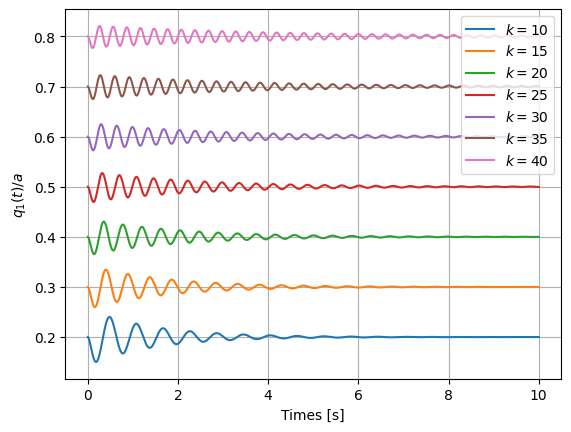

In [7]:
k1,k2,k3,J,R,Km,b,r,m=(1,0.1,0.0,0.01,2.0,2.0,0.25,0.15,0.2)
# k=1.0
tt = np.linspace(0.0,10.0,1024)
fig = plt.figure()
ax = fig.add_subplot(111)
alpha = 1.0
for k in range(10,41,5):
	sys = ct.tf([-r/J,0],[1,b/J,2*(Km*r**2/(m*J)+k/m),2*k*b/(m*J)+2*k*k1*k2*Km*r/(m*J*R)])
	tt, qt = ct.step_response(sys,timepts=tt)
	ax.plot(tt,qt+k/50, label=rf"$k={k}$", alpha=1.0)
	alpha -= 0.15

ax.grid(True)
ax.legend(loc='upper right')
ax.set_xlabel("Times [s]")
ax.set_ylabel(r"$q_1(t)/a$")
plt.show() 